<a href="https://colab.research.google.com/github/sightes/RNA-UBO-2023/blob/main/Redes_neuronales_2023_reconocimiento_caracteres.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
(X_train,Y_train),(X_test,Y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],
                          X_train.shape[2],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],
                        X_test.shape[2],1)
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train/= 255.0
X_test/=255.0

11490434/11490434 [==============================] - 0s 0us/step


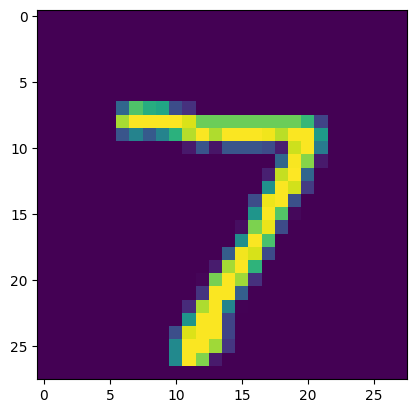

In [ ]:
import matplotlib.pyplot as plt
(X_t,Y_t),(X_t,Y_t) = mnist.load_data()
plt.imshow(X_t[0])

In [ ]:
!wget 'https://raw.githubusercontent.com/sightes/RNA-UBO/main/input.jpg'

--2023-07-01 04:49:51--  https://raw.githubusercontent.com/sightes/RNA-UBO/main/input.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2023-07-01 04:49:51 ERROR 404: Not Found.



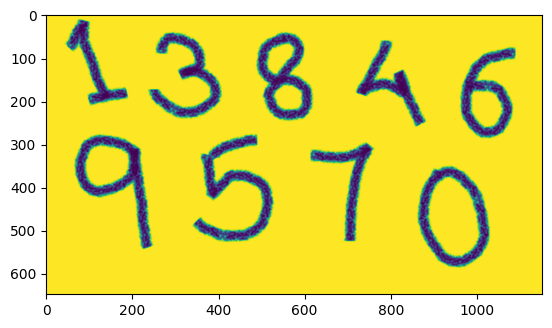

In [ ]:
img=cv2.imread("input.jpg")
img_gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img_blur=cv2.GaussianBlur(img_gray,(5,5),0)
ret,im_th = cv2.threshold(img_blur,180,600,cv2.THRESH_BINARY_INV)
ctrs,hier = cv2.findContours(im_th.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
rect=[cv2.boundingRect(ctr) for ctr in ctrs]
plt.imshow(img_blur)

In [ ]:
#ARQUITECTURA
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout

model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
#_________________________________________
model.add(Flatten())
#__________________________________________
model.add(Dropout(0.5))
model.add(Dense(512,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])




In [ ]:
history=model.fit(X_train,Y_train, epochs=15, validation_data=(X_test,Y_test))

Epoch 1/15
1875/1875 [==============================] - 24s 6ms/step - loss: 0.1842 - accuracy: 0.9419 - val_loss: 0.0376 - val_accuracy: 0.9878
Epoch 2/15
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0741 - accuracy: 0.9772 - val_loss: 0.0332 - val_accuracy: 0.9888
Epoch 3/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0601 - accuracy: 0.9814 - val_loss: 0.0224 - val_accuracy: 0.9925
Epoch 4/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0533 - accuracy: 0.9831 - val_loss: 0.0239 - val_accuracy: 0.9925
Epoch 5/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0441 - accuracy: 0.9861 - val_loss: 0.0227 - val_accuracy: 0.9921
Epoch 6/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0422 - accuracy: 0.9869 - val_loss: 0.0224 - val_accuracy: 0.9930
Epoch 7/15
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0374 - accuracy: 0.9880 - val_loss: 0.0197 - val_ac

1/1 [==============================] - 0s 23ms/step


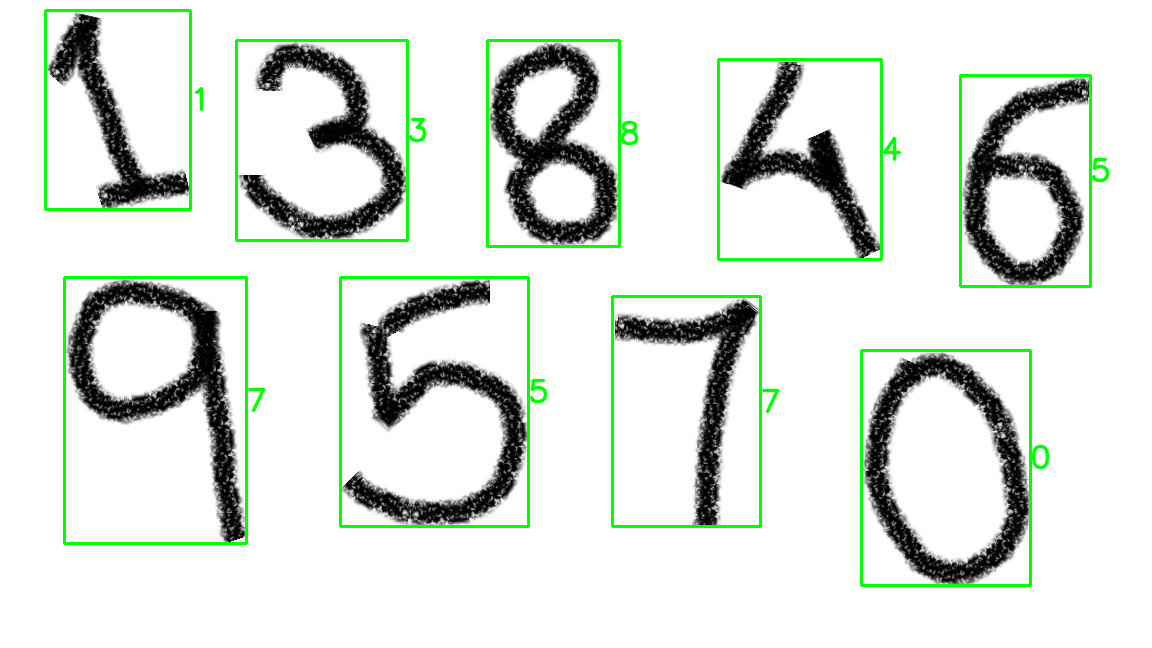

In [ ]:
from tensorflow.keras.preprocessing.image import img_to_array
from google.colab.patches import cv2_imshow #exclusivo de google colab
for x,y,w,h in rect:
  if y>=3:
    y-=3
  else:
    y=0
  if x>=3:
    x-=3
  else:
    x=0
  w+=3
  h+=3
  cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
  #aplicar el modelo
  sliced=im_th[y:y+h,x:x+w]
  sliced=img_to_array(sliced,dtype='float32')
  sliced=cv2.resize(sliced,(28,28)).reshape(28,28,1)/255.0
  sliced=np.expand_dims(sliced,axis=0)
  predict_x=model.predict(sliced)
  prediction=np.argmax(predict_x,axis=1)
  cv2.putText(img,str(prediction[0]),(x+w,y+int(h/2)),cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),2,cv2.LINE_AA)
cv2_imshow(img)